#Mushroom Classification Dataset

![image](https://cdn.britannica.com/90/236590-050-27422B8D/Close-up-of-mushroom-growing-on-field.jpg)

##Dataset Information
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



#Attributes Information
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [ ]:
from pandas.errors import InvalidIndexError
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data" , header=None,names=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

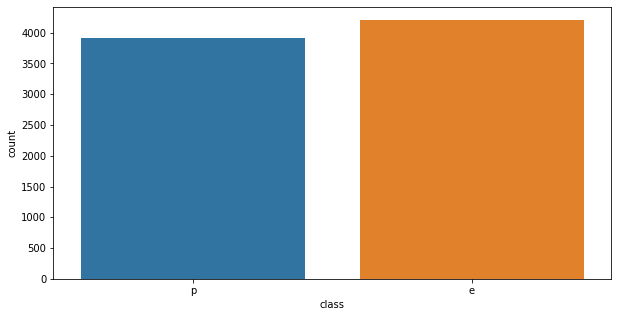

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['class'])

In [ ]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#Splitting dataset into X and y

In [ ]:
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
Encoder_x = LabelEncoder()
for column in X.columns:
  X[column] = Encoder_x.fit_transform(X[column])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
y

array([1, 0, 0, ..., 0, 1, 0])

#Corelation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-type'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

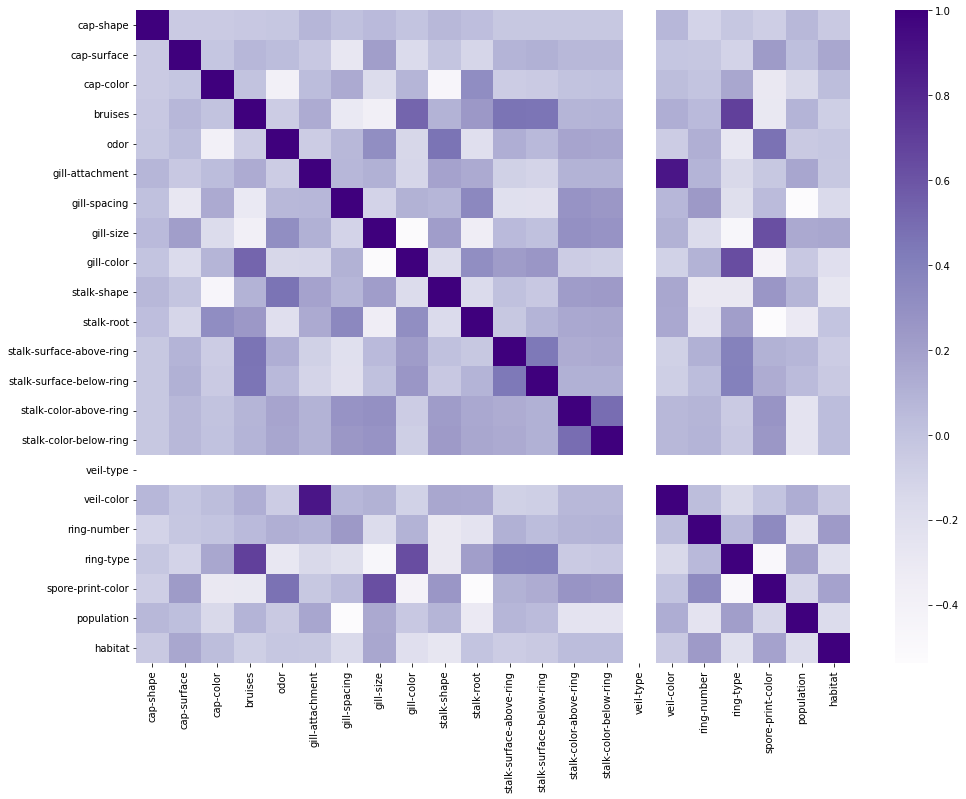

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0)


#Covariance

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-type'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

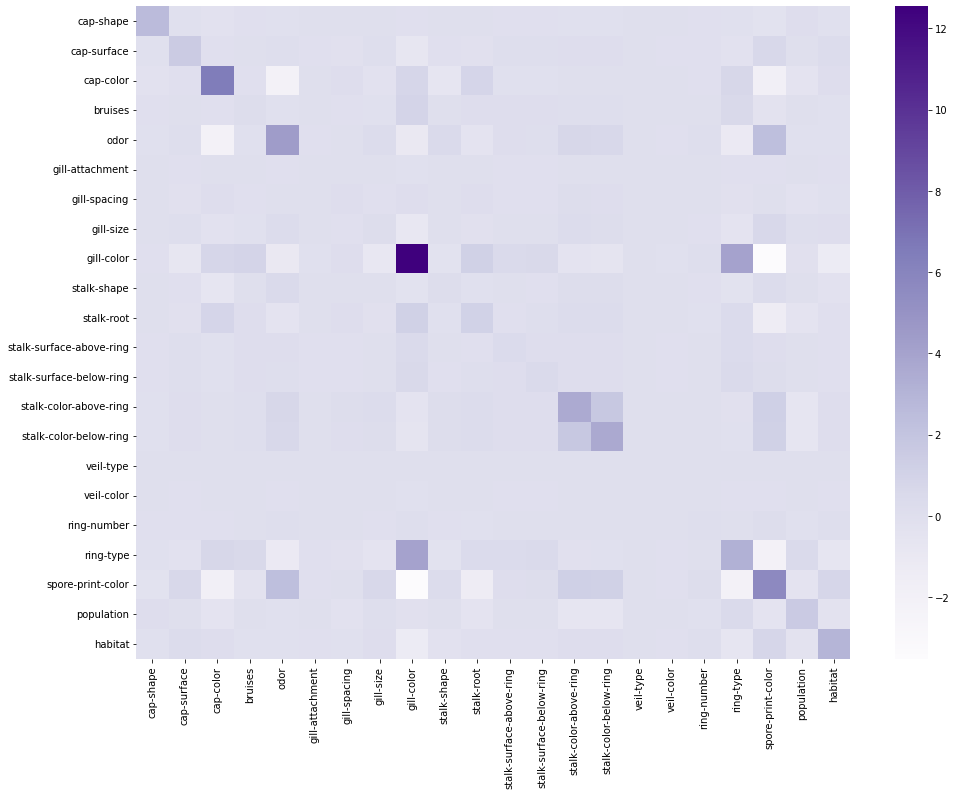

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(X.cov(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0)

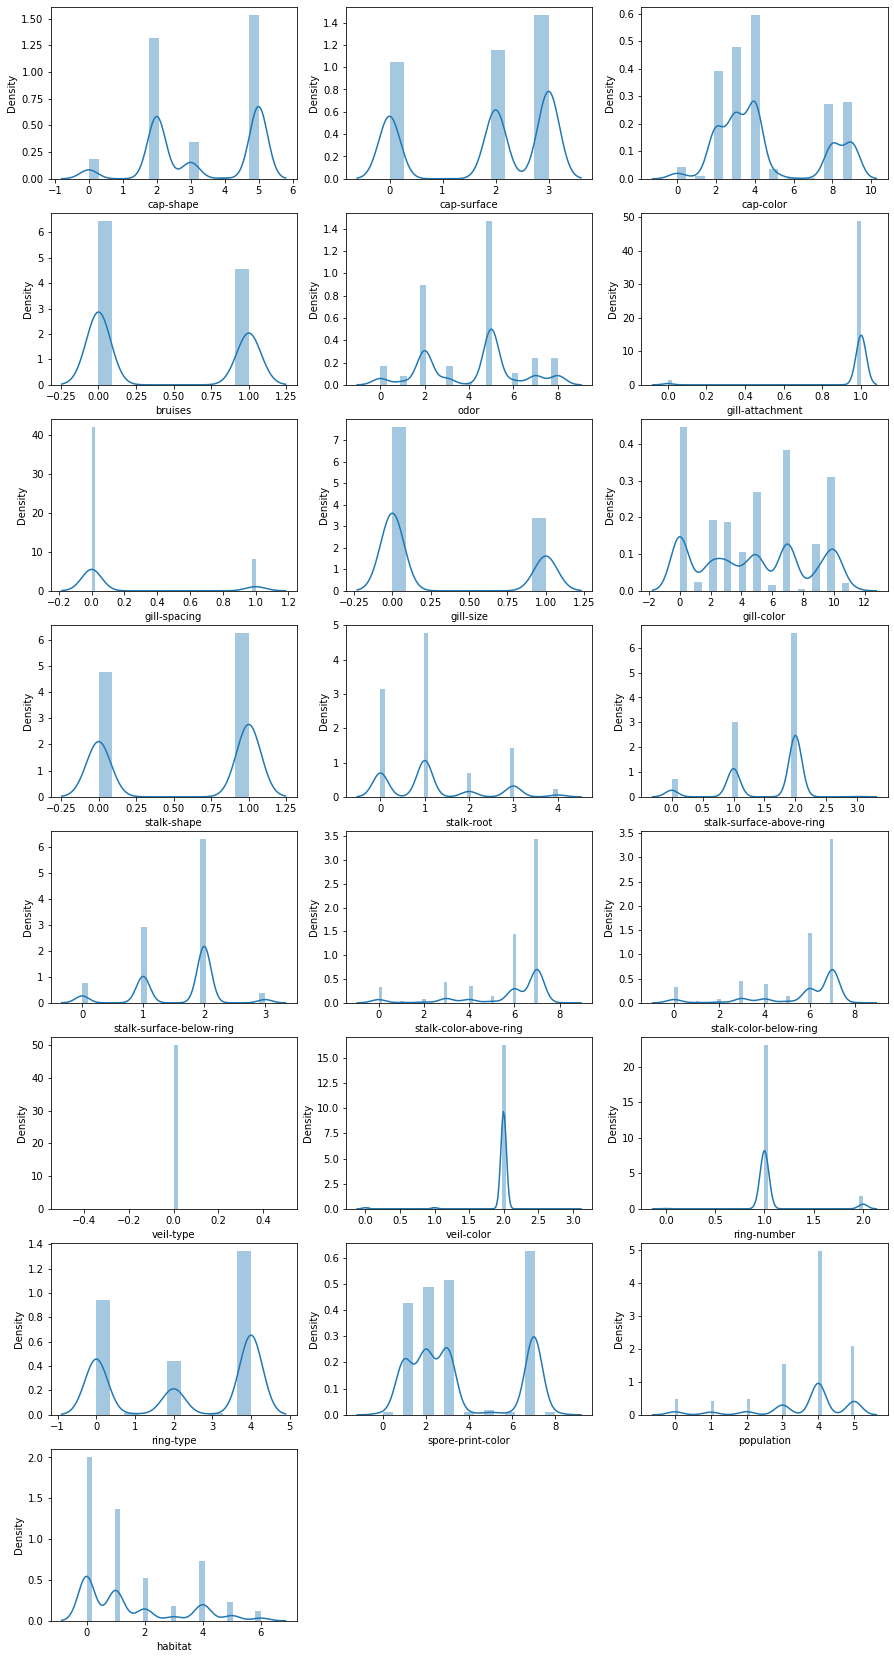

In [ ]:
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for col in X:
  plt.subplot(16,3,plotnumber)
  sns.distplot(X[col])
  plt.xlabel(col,fontsize=10)
  plotnumber+=1
  
plt.show()  

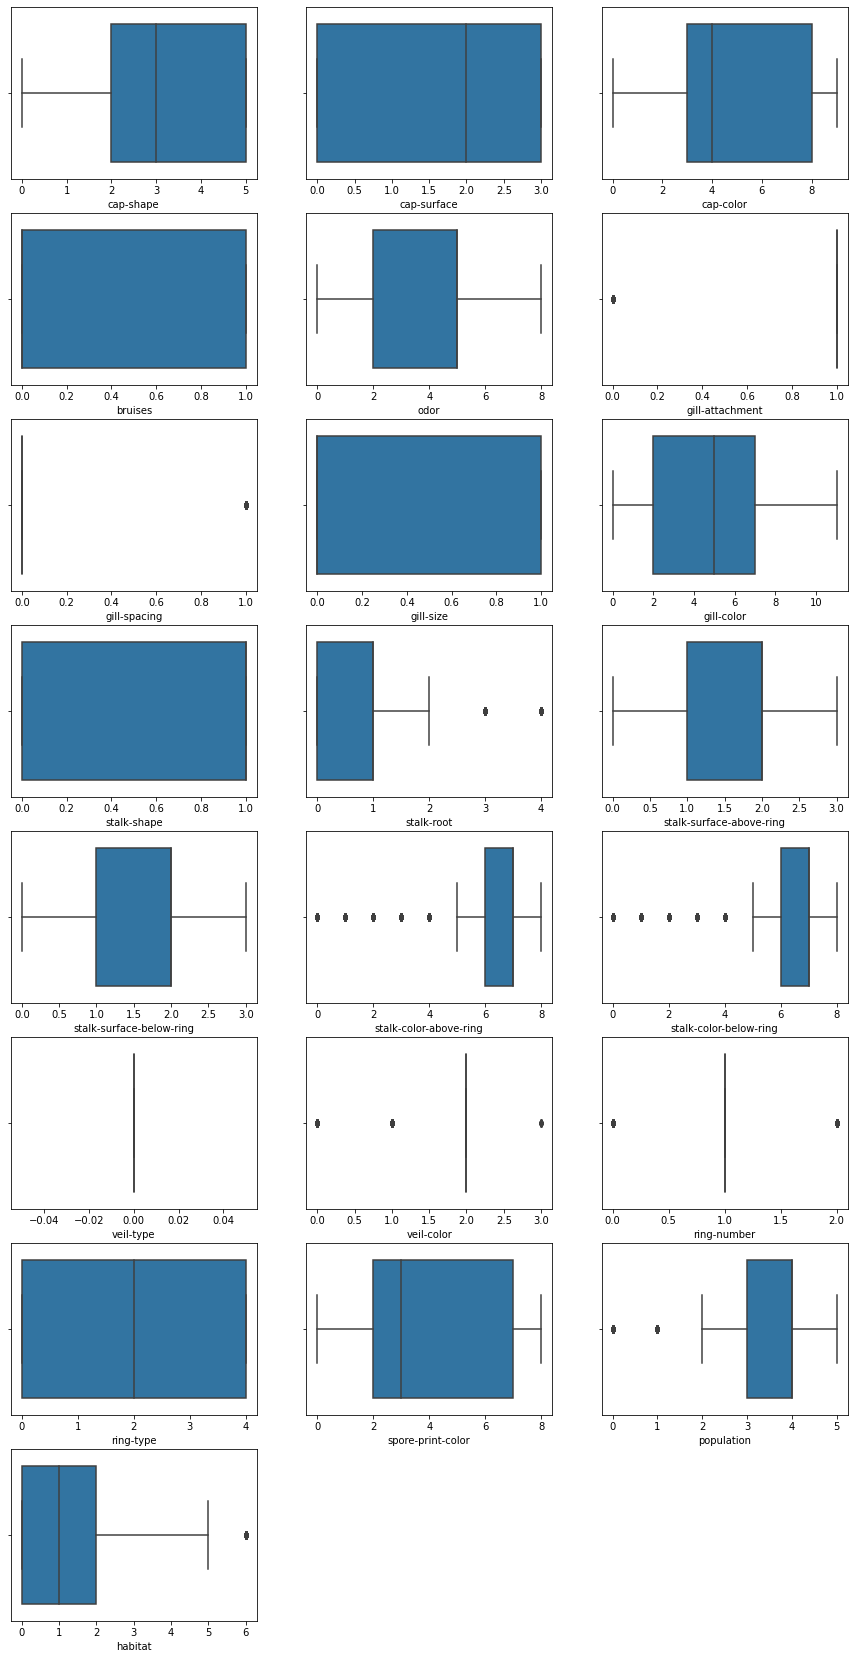

In [ ]:
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for col in X:
  plt.subplot(16,3,plotnumber)
  sns.boxplot(X[col])
  plt.xlabel(col,fontsize=10)
  plotnumber+=1
  
plt.show()  

In [ ]:
scaler = StandardScaler()

In [ ]:
Xs = scaler.fit_transform(X)

In [ ]:
def classify(x, y):
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    rf=RandomForestClassifier()
    xgb = XGBClassifier(learning_rate=0.09,n_estimator=500,max_depth = 30,nthread = 4,subsample=0.75)

    #random_state is the seed to create reproducible output
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,svc,d,log,rf,xgb]
    algos_name=['KNeigbors','SVC','DecisionTree','LogisticRegr','RandomForest','XGBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    # correctness of predictions
    result.AccuracyScore=accuracy
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and 
    # fp the number of false positives. The precision is intuitively the ability of the 
    # classifier not to label as positive a sample that is negative
    result.PrecisionScore=precision
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples.
    result.RecallScore=recall
    # The F1 score can be interpreted as a harmonic mean of the precision and recall,
    # F1 = 2 * (precision * recall) / (precision + recall)
    result.f1_Score=f1
    
    # more metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
    
    
    ret = result.sort_values('f1_Score',ascending=False)
    bestModelName = ret.iloc[0].name
    bestModel = algos[algos_name.index(bestModelName)]
    return (ret, bestModel)
    

In [ ]:
results = classify(Xs,y)
results[0]

[07:14:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



,AccuracyScore,PrecisionScore,RecallScore,f1_Score
KNeigbors,1.000,1.000000,1.000000,1.000000
SVC,1.000,1.000000,1.000000,1.000000
DecisionTree,1.000,1.000000,1.000000,1.000000
RandomForest,1.000,1.000000,1.000000,1.000000
XGBoost,1.000,1.000000,1.000000,1.000000
LogisticRegr,0.952,0.944444,0.956522,0.950445


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Xs,y, random_state=42)
model = results[1]
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

#KNeighbor classifier is the best model 